# Importing all the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Data collection and analysis

In [2]:
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Big mart sales prediction/train.csv')

In [3]:
#print the fisrt 5 rows of the dataset
'''
FD = food 
DR = drink
NC = non consumable

'''
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# print the last 5 rows of the dataset
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# shape of the dataset
df.shape

(8523, 12)

In [6]:
# getting some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#checking for any missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# stastical measure of the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
#checking for categorical data in diff object type columns
objlist = df.select_dtypes('object').columns
for i in objlist:
    print(f'\n{i}')
    print(df[i].value_counts(), end = '\n') 


Item_Identifier
FDG33    10
FDW13    10
FDU12     9
FDX20     9
FDX31     9
         ..
FDY43     1
FDC23     1
FDN52     1
FDO33     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555


Handling the missing values

Mean ---> Average value
Mode ---> Most repeated value

In [10]:
# mean value of 'Item weight' collumn
mean_value = df['Item_Weight'].mean()

In [11]:
# filling the missing value with mean in 'item weight' column
df['Item_Weight'].fillna(mean_value, inplace = True)

In [12]:
#checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# replacing the missing value with mode in 'Outlet Size' column
mode_value = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x : x.mode()[0]))

In [14]:
print(mode_value)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [15]:
missing_values = df['Outlet_Size'].isnull()

In [16]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x : mode_value[x])

In [17]:
#checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data analysis

In [18]:
# stastical measure of the data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical features

In [19]:
sns.set_style(style = 'darkgrid')

<Figure size 432x432 with 0 Axes>

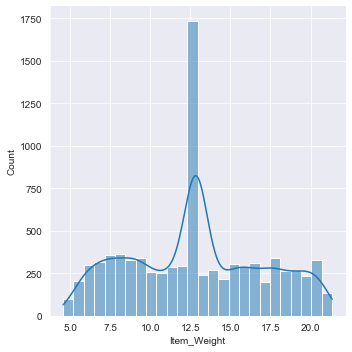

In [20]:
#item weight distribution
plt.figure(figsize = (6,6))
sns.displot(df['Item_Weight'], kde= True)
plt.show()

<Figure size 432x432 with 0 Axes>

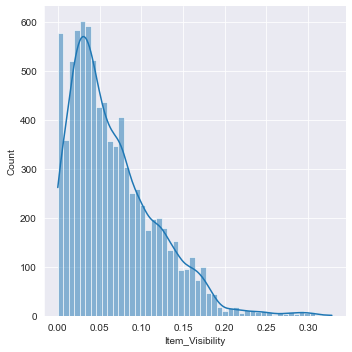

In [21]:
#item visibility distribution
plt.figure(figsize = (6,6))
sns.displot(df['Item_Visibility'], kde= True)
plt.show()

<Figure size 432x432 with 0 Axes>

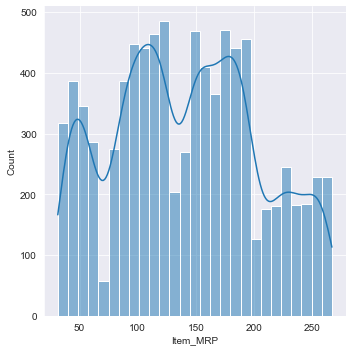

In [22]:
#item MRP distribution
plt.figure(figsize = (6,6))
sns.displot(df['Item_MRP'], kde= True)
plt.show()

<Figure size 432x432 with 0 Axes>

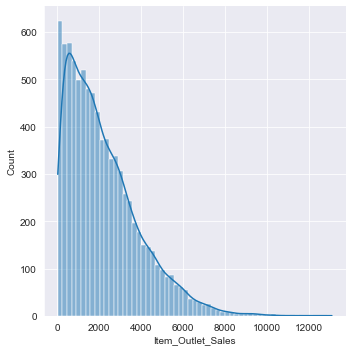

In [23]:
#Item_Outlet_Sales distribution
plt.figure(figsize = (6,6))
sns.displot(df['Item_Outlet_Sales'], kde= True)
plt.show()

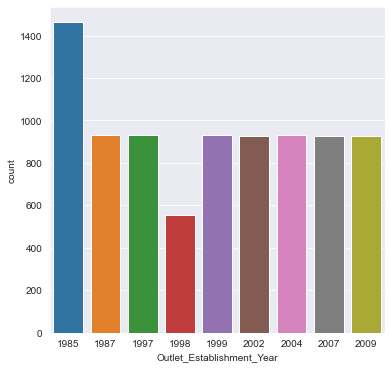

In [24]:
#Outlet_Establishment_Year distribution
plt.figure(figsize = (6,6))
sns.countplot(x= 'Outlet_Establishment_Year', data = df)
plt.show()

Categoruical features

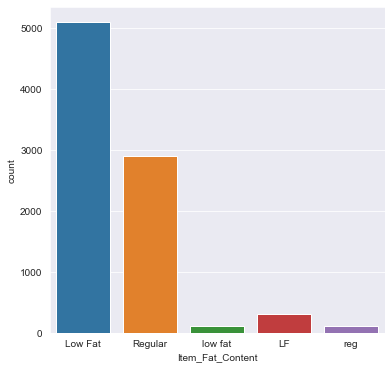

In [25]:
#Item_Fat_Content distribution
plt.figure(figsize = (6,6))
sns.countplot(x= 'Item_Fat_Content', data = df)
plt.show()

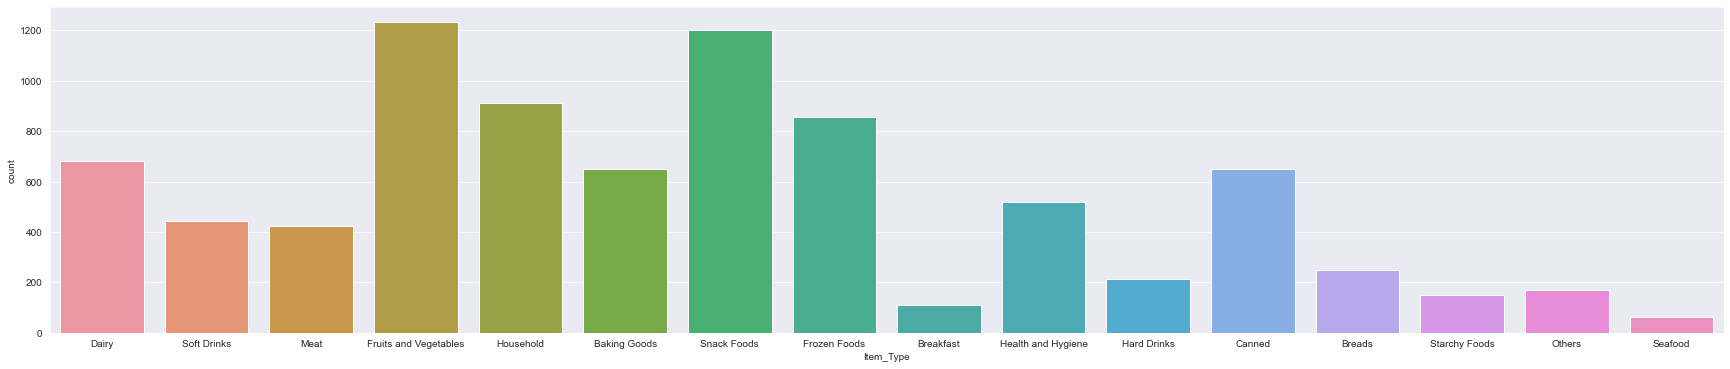

In [26]:
# Item_Type	 distribution
plt.figure(figsize = (30,6))
sns.countplot(x= 'Item_Type', data = df)
plt.show()

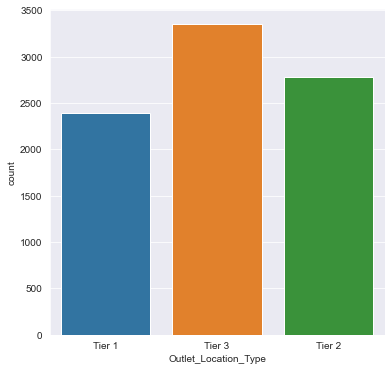

In [27]:
# Outlet location type distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Location_Type', data = df)
plt.show()

# Data preprocessing

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
df.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}}, inplace = True)

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [32]:
encoder = LabelEncoder()

objlist = df.select_dtypes('object').columns
for i in objlist:
    df[i] = encoder.fit_transform(df[i])

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [34]:
correlation = df.corr()

                           Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.044518         -0.114660   
Item_Weight                       0.044518     1.000000         -0.021157   
Item_Fat_Content                 -0.114660    -0.021157          1.000000   
Item_Visibility                  -0.025482    -0.012049          0.047314   
Item_Type                        -0.017973     0.028015         -0.139434   
Item_MRP                          0.012853     0.024756          0.006063   
Outlet_Identifier                -0.008602    -0.007975          0.000764   
Outlet_Establishment_Year        -0.012772    -0.008301          0.003151   
Outlet_Size                       0.001229    -0.014105         -0.001262   
Outlet_Location_Type              0.003656     0.004088         -0.001598   
Outlet_Type                      -0.001178    -0.000566          0.002199   
Item_Outlet_Sales                 0.002869     0.011550          0.018719   

<AxesSubplot:>

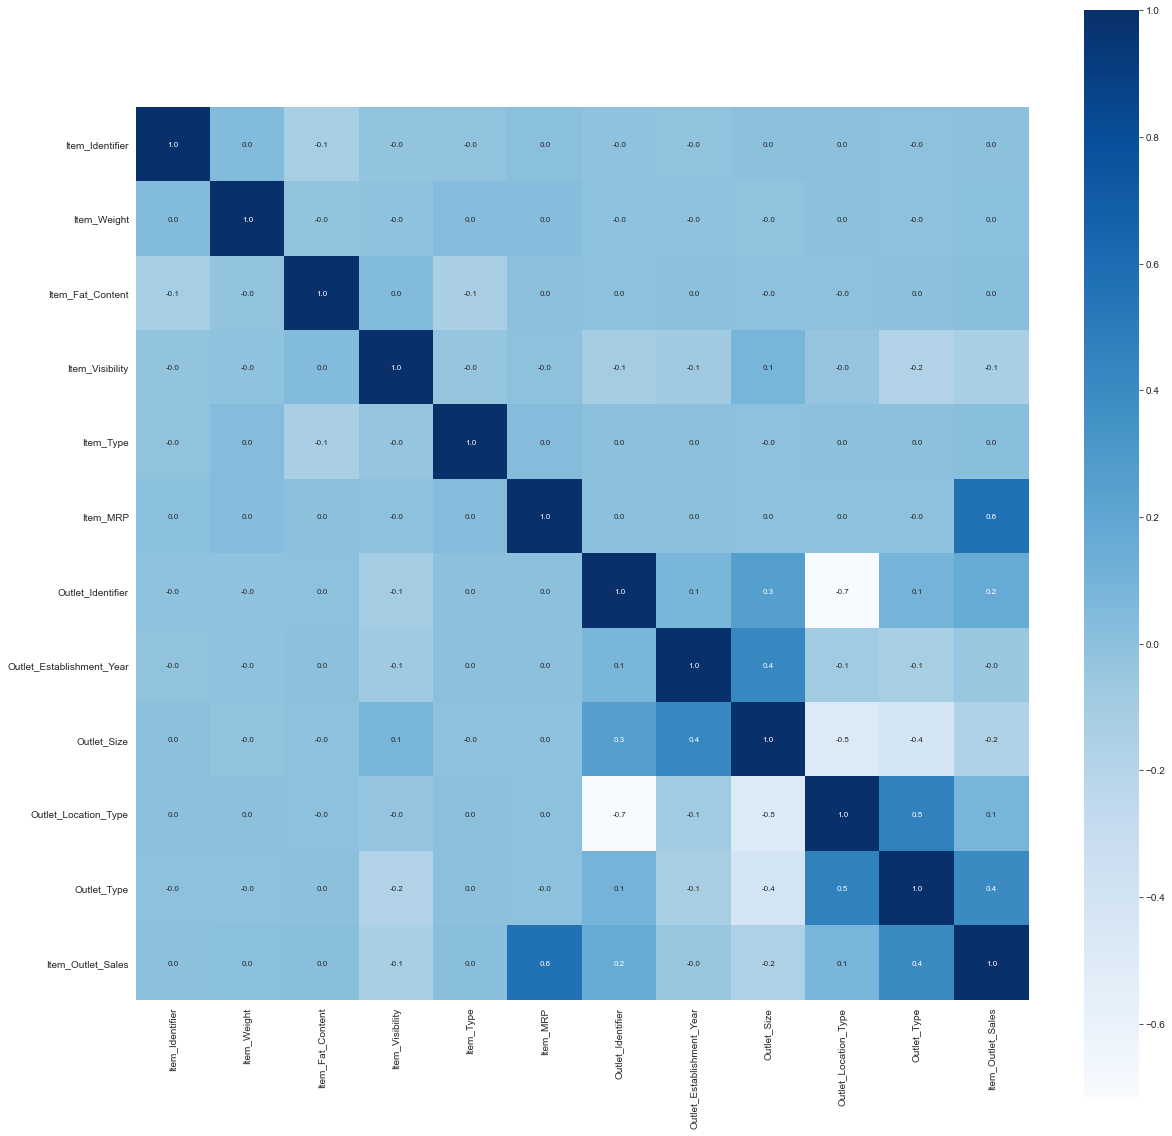

In [43]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation , cbar = True, cmap = 'Blues',square = True, annot = True, fmt = '.1f', annot_kws = {'size' : 8})

Splitting features and targets

In [36]:
X = df.drop(columns = 'Item_Outlet_Sales' ,axis = 1)
Y = df['Item_Outlet_Sales']

# Splitting the data into training and testing data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 6)

In [38]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(6818, 11) (1705, 11)
(6818,) (1705,)


# Machine learning model

In [39]:
model = XGBRegressor()

In [40]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model evaluatuion on training data

In [41]:
train_prediction = model.predict(x_train)

accuracy_training = metrics.r2_score(y_train, train_prediction)
print('R SQUARED ERROR OF TRAINING DATA :', accuracy_training)

R SQUARED ERROR OF TRAINING DATA : 0.8648202899616662


Model evaluatuion on testing data

In [42]:
test_prediction = model.predict(x_test)

accuracy_testing = metrics.r2_score(y_test, test_prediction)
print('R SQUARED ERROR OF TESTING DATA :', accuracy_testing)

R SQUARED ERROR OF TESTING DATA : 0.5195941399675931
